          id  severity          start_time            end_time        city  \
0  A-4663561         4 2023-01-24 16:01:46 2023-01-24 17:20:37  Fort Smith   
1  A-4663562         2 2022-02-09 17:09:09 2022-02-09 18:54:09  Montgomery   
2  A-4663563         2 2022-02-03 15:45:25 2022-02-03 17:30:25  Montgomery   
3  A-4663564         2 2022-01-17 14:10:09 2022-01-17 16:59:42     Mankato   
4  A-4663565         2 2022-09-08 14:44:02 2022-09-08 16:00:03  Fort Myers   

  state  temperature  humidity weather_condition  visibility  wind_speed  \
0    AR         33.0      96.0        Heavy Snow         0.5        12.0   
1    AL         61.0      29.0              Fair        10.0         6.0   
2    AL         68.0      94.0        Light Rain         9.0        13.0   
3    MN         31.0      72.0              Fair        10.0        10.0   
4    FL         84.0      74.0     Partly Cloudy        10.0         8.0   

   accident_duration  
0      4731000000000  
1      6300000000000  
2    

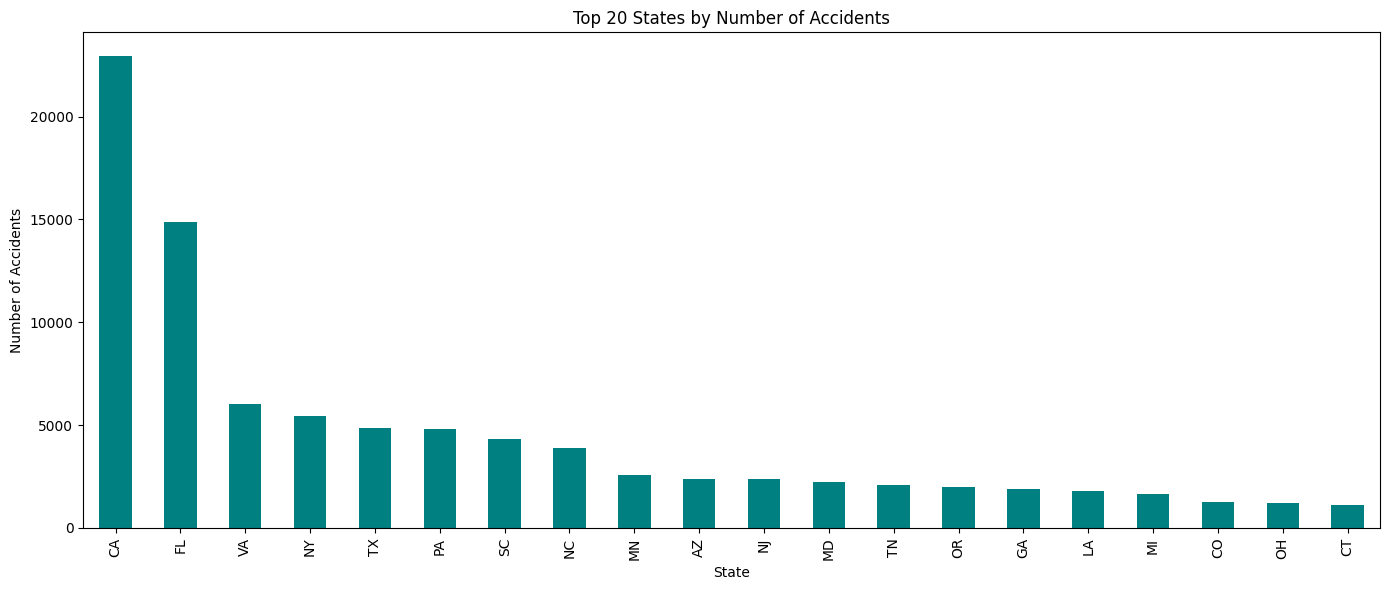

C:\Users\hp\AppData\Local\Temp\ipykernel_6432\703306957.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='severity', data=df, palette='magma')


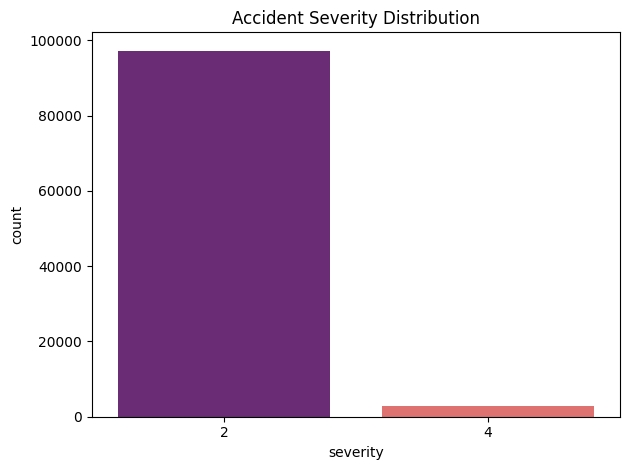

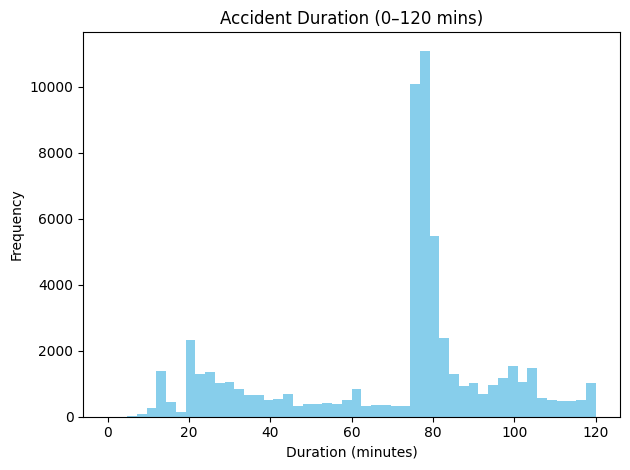

In [4]:
# Ensure the visualizations folder exists
os.makedirs("visualizations", exist_ok=True)

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load .env
load_dotenv()
engine = create_engine(os.getenv("DATABASE_URL"))

# Load data
query = "SELECT * FROM accidents LIMIT 100000;"
df = pd.read_sql(query, engine)

# Overview
print(df.head())
print(df.info())

# -------------------------
# 1. Accidents by State
# -------------------------
plt.figure(figsize=(14,6))
df['state'].value_counts().head(20).plot(kind='bar', color='teal')
plt.title("Top 20 States by Number of Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.savefig("visualizations/accidents_by_state.png")
plt.show()

# -------------------------
# 2. Severity Distribution
# -------------------------
sns.countplot(x='severity', data=df, palette='magma')
plt.title("Accident Severity Distribution")
plt.tight_layout()
plt.savefig("visualizations/severity_distribution.png")
plt.show()

# -------------------------
# 3. Accident Duration Histogram
# -------------------------
df['accident_duration'] = pd.to_timedelta(df['accident_duration'])
duration_minutes = df['accident_duration'].dt.total_seconds() / 60

plt.hist(duration_minutes, bins=50, range=(0, 120), color='skyblue')
plt.title("Accident Duration (0–120 mins)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("visualizations/accident_duration_hist.png")
plt.show()
